In [13]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt


In [14]:
import cv2
import numpy as np
from scipy.ndimage import gaussian_laplace, sobel, distance_transform_edt

class ImageFilter:
    def __init__(self, image_path):
        # Load the image in grayscale
        self.image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    def gaussian_high_pass(self, sigma=2):
        """
        Applies a Gaussian High-Pass filter by subtracting a Gaussian-blurred version from the original.
        """
        low_pass = cv2.GaussianBlur(self.image, (0, 0), sigma)
        high_pass = cv2.subtract(self.image, low_pass)
        return high_pass

    def local_intensity_normalized_high_pass(self, sigma=2):
        """
        Applies a Local Intensity-Normalized High-Pass filter.
        """
        low_pass = cv2.GaussianBlur(self.image, (0, 0), sigma)
        high_pass = self.image - low_pass
        norm_high_pass = cv2.normalize(high_pass, None, 0, 255, cv2.NORM_MINMAX)
        return norm_high_pass

    def distance_transformed_edge_map(self):
        """
        Applies a Distance-Transformed Edge Map filter.
        """
        # Apply edge detection
        edges = cv2.Canny(self.image, 100, 200)
        # Perform distance transform on the edges
        dist_transform = distance_transform_edt(edges)
        # Normalize the result for visualization
        dist_transform = cv2.normalize(dist_transform, None, 0, 255, cv2.NORM_MINMAX)
        return dist_transform.astype(np.uint8)

    def laplacian_of_gaussian(self, sigma=2):
        """
        Applies the Laplacian-of-Gaussian (LoG) filter.
        """
        log_image = gaussian_laplace(self.image, sigma=sigma)
        # Scale and convert to 8-bit for visualization
        log_image = cv2.normalize(log_image, None, 0, 255, cv2.NORM_MINMAX)
        return log_image.astype(np.uint8)

    def directional_grey_scale_derivatives(self):
        """
        Computes directional grayscale derivatives using Sobel operators.
        """
        # Calculate Sobel derivatives
        sobel_x = sobel(self.image, axis=0, mode='reflect')
        sobel_y = sobel(self.image, axis=1, mode='reflect')
        # Combine gradients
        magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
        magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
        return magnitude.astype(np.uint8)

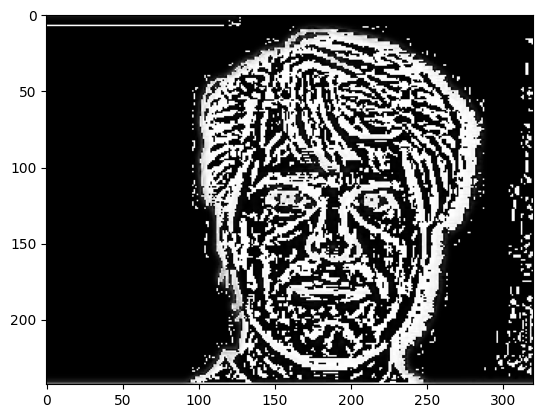

In [26]:
def process_img(img):
    
    im = ImageFilter(img)
    im1 = None
    im2 = im.distance_transformed_edge_map()
    im3 = im.gaussian_high_pass(2)
    im4 = im.laplacian_of_gaussian(2)
    im5 = im.local_intensity_normalized_high_pass(2)
    
    return im1,im2,im3,im4,im5

img = "data_new/subject01.centerlight_frame_1.jpg"
im = ImageFilter(img)

# print(process_img(img))

plt.imshow(process_img(img)[4],cmap='gray')
plt.show()
